### Feature Selection Exercie

In this exercise, we will apply Feature Selection to a Iris flowers dataset, where the target variable is the Species. Essentially, our goal is to identify the features that are most relevant in discerning the species of each Iris flower. The dataset is from: https://www.kaggle.com/datasets/uciml/iris
You can view the demos found in the repository for some methods.

1. Load the dataset from the exercise's Github Repository (Iris.csv)
2. Using buisness logic/common sense, drop features that are surely irrevelvant to the target variable.
3. Preprocess your data (split data into training and testing)
4. Apply feature selection using any 3 (three) different methods:
(Hint) Since the target variable, Species, is categorical, you can apply the numerical methods on the numerical predictor variables against themselves instead to reduce Feature redundancy.
    - Pearson's correlation coefficient (r)
    - Kendall's tau (τ)
    - Mutual Information (MI)
    - Logistic Regression with L1 penalty
    - Any other method/model of Feature Selection....
6. Compare the results of each feature selection method:
    - What features did you manually dropped before applying the feature selection methods? Explain why.
    - Are there any common features selected across multiple methods?
    - Can you explain why certain features were selected based on their characteristics?
(Optional) Visualize the importance of features using techniques like bar charts or heatmaps to make it easier to compare.



In [26]:
#Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pearsonr, kendalltau
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [27]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,FlowerColour,YearCollected,MonthCollected,StigmaLegnth,Species
0,1,5.1,3.5,1.4,0.2,Purple,2003,2,2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Orange,1998,9,1,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Black,1995,5,3,Iris-setosa
3,4,4.6,3.1,1.5,0.2,White,2008,3,3,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Teal,2007,9,1,Iris-setosa
...,...,...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Purple,2001,5,3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Lime,2006,10,4,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Silver,2007,10,2,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Lime,2002,6,4,Iris-virginica


In [28]:
df = df.dropna()

le = LabelEncoder()
df["FlowerColour"] = le.fit_transform(df["FlowerColour"])
df["Species"] = le.fit_transform(df["Species"])

X = df.drop("Species", axis=1)
y = df["Species"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Selection

In [30]:
#Feature Selection with Pearson's

# Calculate correlations between features and 
y_train_df = pd.DataFrame(y_train, columns=['Target'])
# correlations = X_train.corrwith(y_train_df['Target'])

def pearson_corr(X, y):
    return X_train.corrwith(y_train_df['Target']).abs()

# Select top k features with highest absolute correlation
k = 3
selector = SelectKBest(score_func=pearson_corr, k=k)
selected_features_r = selector.fit(X_train, y_train).get_support(indices=True)

print("Features selected by Pearson's r:", X_train.columns[selected_features_r])

Features selected by Pearson's r: Index(['YearCollected', 'MonthCollected', 'StigmaLegnth'], dtype='object')


In [31]:
#Feature Selection with Kendall's tau (τ)

# Calculate Kendall's tau for each feature with target
tau_scores = []
for feature in X_train.columns:
    tau, _ = kendalltau(X_train[feature], y_train)
    tau_scores.append(abs(tau))

# Select top k features with highest absolute tau
k = 3
selector = SelectKBest(score_func=lambda X, y: (tau_scores, [0] * len(tau_scores)), k=k)
selected_features_tau = selector.fit(X_train, y_train).get_support(indices=True)

# Print selected features
print("Features selected by Kendall's tau:", X_train.columns[selected_features_tau])

Features selected by Kendall's tau: Index(['Id', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')


In [32]:
#Feature Selection with Mutual Information (MI)

# Calculate Mutual Information for each feature with target
mi_scores = mutual_info_regression(X_train, y_train)

# Select top k features with highest mutual information
k = 3
selector = SelectKBest(score_func=mutual_info_classif, k=k)
selected_features_mi = selector.fit(X_train, y_train).get_support(indices=True)

# Print selected features
print("Features selected by Mutual Information:", X_train.columns[selected_features_mi])

Features selected by Mutual Information: Index(['Id', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')


In [33]:
#Feature Selection with Logistic Regression with L1 penalty

# Fit Logistic Regression with L1 penalty
model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(X_train, y_train)

# Get coefficients and select non-zero features
coefs = model.coef_[0]
selected_features_lr = X_train.columns[coefs != 0]

# Print selected features
print("Features selected by Logistic Regression L1:", selected_features_lr)

Features selected by Logistic Regression L1: Index(['Id', 'YearCollected', 'StigmaLegnth'], dtype='object')


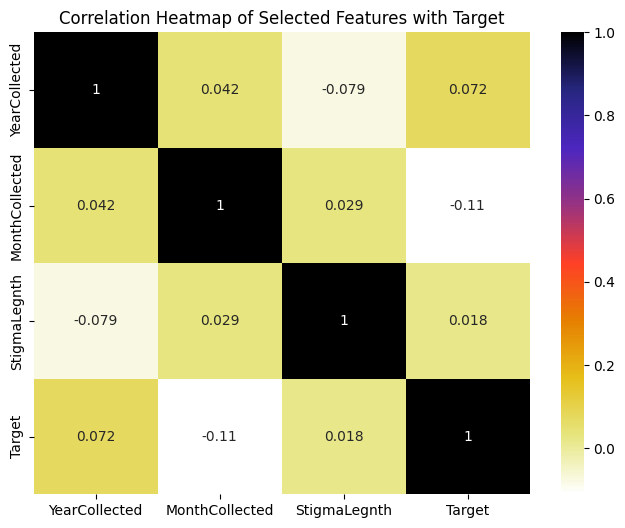

In [34]:
r = X_train[X_train.columns[selected_features_r]].copy()
r['Target'] = y_train
correlation_matrix = r.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=plt.cm.CMRmap_r)
plt.title('Correlation Heatmap of Selected Features with Target')
plt.show()

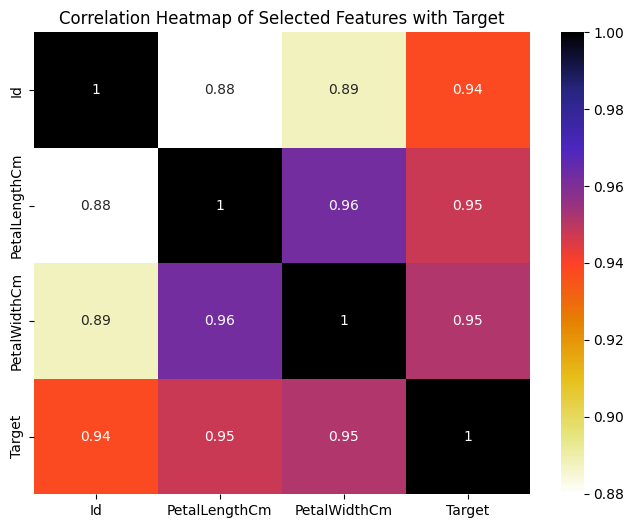

In [35]:
tau = X_train[X_train.columns[selected_features_tau]].copy()
tau['Target'] = y_train
correlation_matrix = tau.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=plt.cm.CMRmap_r)
plt.title('Correlation Heatmap of Selected Features with Target')
plt.show()

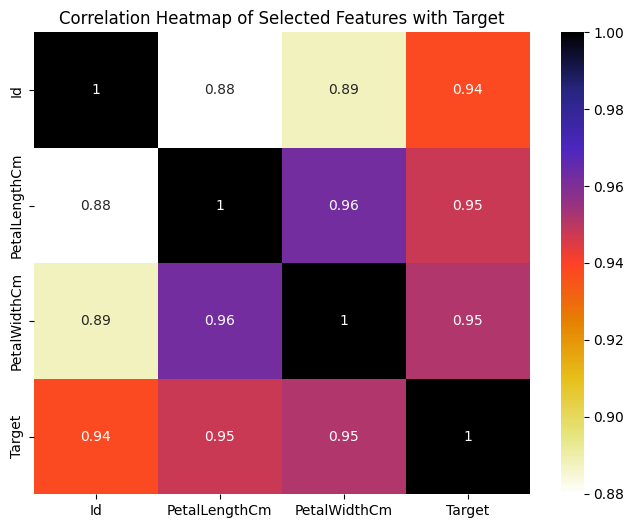

In [36]:
mi = X_train[X_train.columns[selected_features_mi]].copy()
mi['Target'] = y_train
correlation_matrix = mi.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=plt.cm.CMRmap_r)
plt.title('Correlation Heatmap of Selected Features with Target')
plt.show()

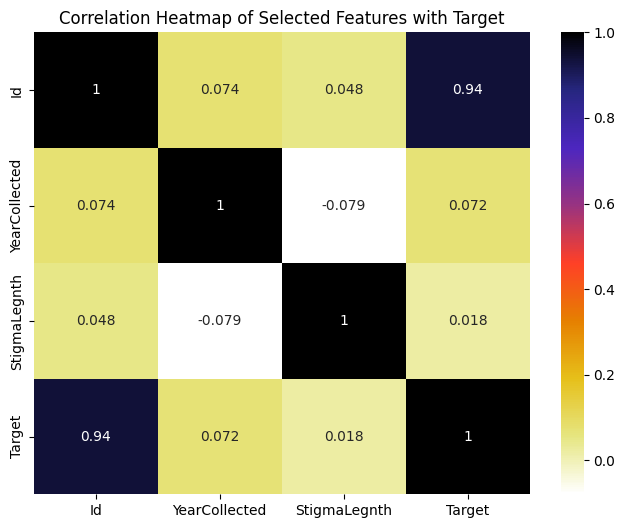

In [37]:
lr = X_train[selected_features_lr].copy()
lr['Target'] = y_train
correlation_matrix = lr.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=plt.cm.CMRmap_r)
plt.title('Correlation Heatmap of Selected Features with Target')
plt.show()